# Manifolds for Categorical Distribution
Presented by: Steven Lin and Ian Wu


### What is a Categorical Distribution?
A Categorical distribution describes the results of a random variable that can take on one of $K$ categories for $K \in \mathbb{Z}_+$. 

Examples:
- Coin Flipping ($K=2$) - Two possible results: head and tail.
- Die Rolling ($K=6$) - Six possible results: 1, 2, 3, 4, 5, and 6.
<p float="left">
  <img src="images/coins.png" height="150" />
  <img src="images/dice.jpeg" height="150" /> 
</p>


### Probability 101
Fundamental Axioms of Probability
- A probability is always a real number that falls in the open interval $[0,1]$
- $P(\Omega) = 1$ where $\Omega$ is the whole sample space containing all possible outcomes

Examples:
- Given the probability of head in a coin flip $P(H)$ would mean that the probability of tail is $P(T)=1-P(H)$. Only one value is needed to describe a two-outcome random variable.

### The Manifold
- Observation: Only $K-1$ probabilities are needed to characterize a $K$-category distribution. The last probability can be inferred by one minus the sum of the other $K-1$ probabilities.

- Result: A $K-1$ dimensional manifold for a $K$-category distribution.
- Constraint (Intuition): Each of the $K-1$ probabilities as well as their sum must lie in the open interval $[0,1]$.
- Result: The manifold natually forms a **level set** that has the geometry known as the standard (k-1)-dimensional solid regular simplex for a k-category distribution.
- Definition for regular k-simplex:
 $\{x\in\mathbb{R}^k:x_0+...+x_{k-1}=1,x_i\geq 0 \: \forall i = 0,...,k-1\}$


### Shape of N-Dimensional Simplex
- A 0-D simplex is a point (Only one category with 100% Accuracy)
- A 1-D simplex is a line from 0 to 1 (Corresponding to the probability of one of the two events)
- A 2-D simplex is a triangle
- A 3-D simplex is a tetrahedron
- N-D simplex ...
<center><img src="images/simplex.jpg" width=650px alt=\"default\"/></center>

### Visualization of the 2D and 3D Manifold

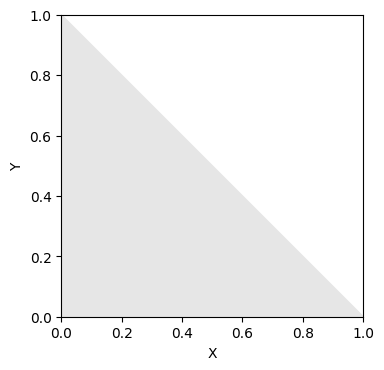

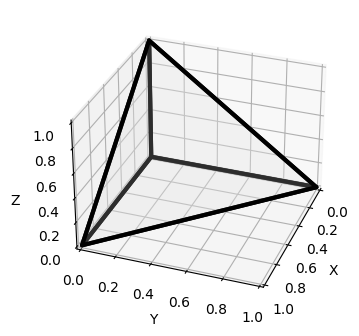

In [76]:
# Plot the Manifold with dimension 2 and 3
import CategoricalDistributionsManifold
import numpy as np
import importlib
importlib.reload(CategoricalDistributionsManifold)
M2 = CategoricalDistributionsManifold.CategoricalDistributionsManifold(dim = 2)
M3 = CategoricalDistributionsManifold.CategoricalDistributionsManifold(dim = 3)

M2.plot()
M3.plot()

### Visualization of Random Samples over the Manifold

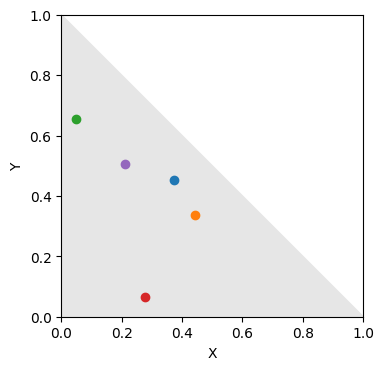

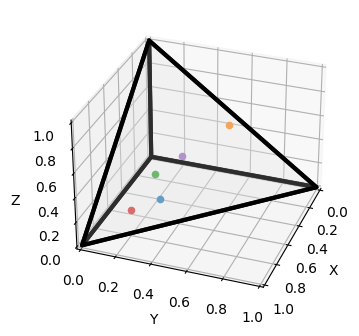

In [77]:
# Plot the 2D and 3D manifold with random points
M2.scatter(n_samples=5)
M3.scatter(n_samples=5)

In [78]:
# Bonus! Interactive Plot with 2D Manifold
import json

from bokeh.embed import json_item
from bokeh.models import ColumnDataSource, CustomJSHover, HoverTool
from bokeh.plotting import figure, show


points2 = np.array([[0, 0, 0], [0.5, 0.5, 0], [1, 0, 0], [0, 1, 0], [1/3, 1/3, 1/3]])

x = []
y = []

for point in points2:
    x.append(point[0])
    y.append(point[1])

num_points = len(points2)

x_labels = ['x', 'y', 'z']
y_range = [0, 1]
bar_plots = []
source = ColumnDataSource(data=dict(x=x, y=y))
for i in range(num_points):
    temp = figure(x_range = x_labels, y_range = y_range, plot_height=400, plot_width=200, toolbar_location=None)
    temp.vbar(x = x_labels, top=[x[i], y[i], 1 - x[i] - y[i]], width=0.5)
    bar_plots.append(json.dumps(json_item(temp, "tooltip-plot")))

source.data['plot'] = bar_plots



p = figure()
p.circle('x', 'y', size=10, source=source, name = 'points')
p.line(x = [1, 0], y = [0, 0])
p.line(x = [0, 0], y = [0, 1])
p.line(x = [1, 0], y = [0, 1])


code="""
    Bokeh.embed.embed_item(JSON.parse(value))
    return ""
"""


hover = HoverTool(
    tooltips='<div id="tooltip-plot">@plot{custom}</div>',
    formatters={ '@plot': CustomJSHover(code=code) },
    names = ['points']
)

p.add_tools(hover)

show(p)

### Visualization of Exp
Given an initial point and an initial tangent vector. Where will the destination be?

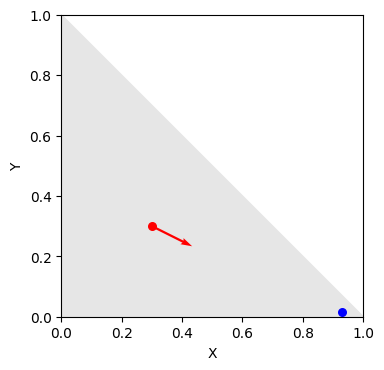

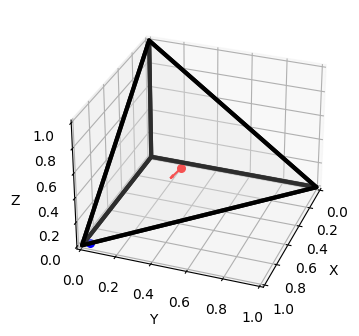

In [79]:
#Visualization of Exp
from geomstats.information_geometry.categorical import CategoricalDistributions, CategoricalMetric
dist2 = CategoricalDistributions(dim = 2)
vector2 = np.array([1,0,0])
base_point2 = np.array([0.3, 0.3, 0.4])
tangent_vector2 = dist2.to_tangent(vector = vector2, base_point= base_point2)

M2.plot_exp(tangent_vec = tangent_vector2, base_point = base_point2)

dist3 = CategoricalDistributions(dim = 3)
vector3 = np.array([1,0,0,0])
base_point3 = np.array([0.3, 0.3, 0.2, 0.2])
tangent_vector3 = dist3.to_tangent(vector = vector3, base_point= base_point3)

M3.plot_exp(tangent_vec = tangent_vector3, base_point = base_point3)

### Visualization of Geodesics with Initial and End Points Specified

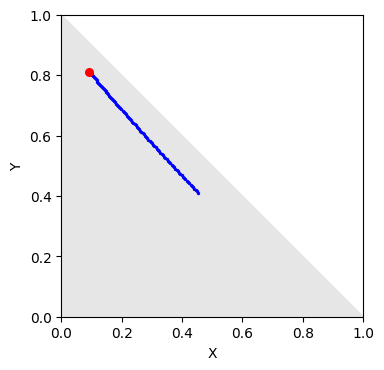

In [80]:
# Plot the manifold with geodesic with initial and end point specified
points = dist2.random_point(n_samples = 2)
# Special Cases
# points = np.array([[0,0,1], [0,1,0]])
# points = np.array([[0,0,1], [1,0,0]])
# points = np.array([[0.25,0.75,0], [0.75,0.25,0]])
M2.plot_geodesic(initial_point = points[0], end_point = points[1])


### Visualization of Geodesics with Initial Point and Initial Tangent Vector Specified

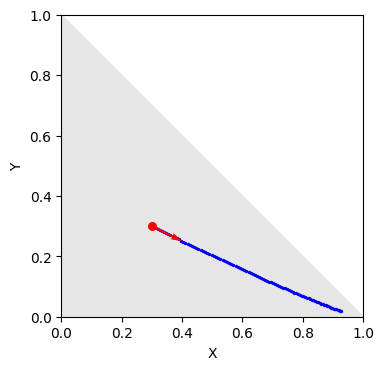

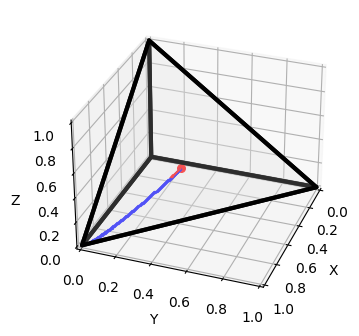

In [81]:

# Plot the manifold with geodesic with initial point and initial tangent_vector specified
vector2 = np.array([1,0,0])
base_point2 = np.array([0.3, 0.3, 0.4])
tangent_vector2 = dist2.to_tangent(vector = vector2, base_point= base_point2)

M2.plot_geodesic(initial_point = base_point2, tangent_vector = tangent_vector2)

vector3 = np.array([1,0,0,0])
base_point3 = np.array([0.3, 0.3, 0.2, 0.2])
tangent_vector3 = dist3.to_tangent(vector = vector3, base_point= base_point3)

M3.plot_geodesic(initial_point = base_point3, tangent_vector = tangent_vector3)




### Plot the Geodesic Grid for a 2D Manifold

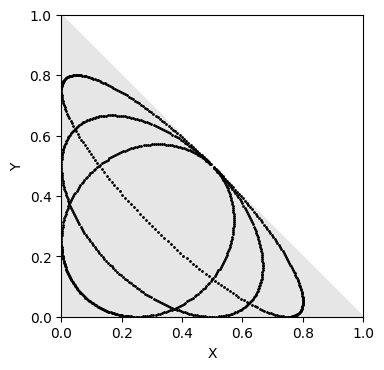

In [82]:
# Geodesic Grid for 2D Manifold
M2.plot_grid()

### Elliptical Geodesic Grid
The geodesics are elliptical because the Fisher Metric that is used for this manifold embeds an n-simplex into an n-hypersphere. 
Intuition, the geodesics are elliptical because they are the projection of the geodesics on the n-sphere back to the n-simplex.

<center><img src="images/embed.jpeg" width=300px alt=\"default\"/></center>

Image Credit: Åström, F., Petra, S., Schmitzer, B. et al. Image Labeling by Assignment. J Math Imaging Vis 58, 211–238 (2017). https://doi.org/10.1007/s10851-016-0702-4


### Visualization of Log
Given an initial point and an end point. What tangent vector from the initial point would take us to the end point?

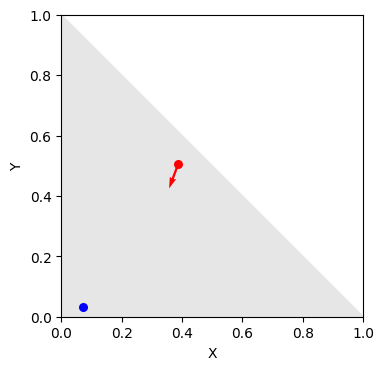

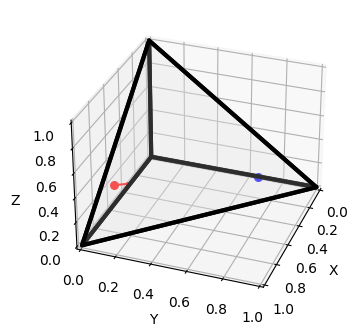

In [84]:
# Visualization of Log
points2 = dist2.random_point(n_samples=2)
M2.plot_log(points2[0],points2[1])

points3 = dist3.random_point(n_samples=3)
M3.plot_log(points3[0],points3[1])


### Applications
#### Questionairre Analysis
Questionaiires often contains categorical data where the user has to select among a few options. Ex. Ethnicity, Nationality, ...


Har-Shemesh, O., Quax, R., Lansing, J.S. et al. Questionnaire data analysis using information geometry. Sci Rep 10, 8633 (2020). https://doi.org/10.1038/s41598-020-63760-8

#### Color Naming
Grass usually looks 'green', and the sky usually looks 'blue' to most of us. But given a color somewhere in the middle, when do we tend to characterize it with 'turquoise'?

This is a categorical distribution with 3 categories.

<center><img src="images/color_naming.png" width=650px alt=\"default\"/></center>

Griffin LD, Mylonas D (2019) Categorical colour geometry. PLoS ONE 14(5): e0216296.https://doi.org/10.1371/journal.pone.0216296


#### Dome Design
The goal is to design a stable dome with some supporting bars, but we only have bars with certain cross-sectional areas to choose from. 

<center><img src="images/dome.jpeg" width=650px alt=\"default\"/></center>

Gao, Huanhuan et al. “Categorical Structural Optimization Using Discrete Manifold Learning Approach and Custom-Built Evolutionary Operators.” Structural and multidisciplinary optimization 58.1 (2018): 215–228. Web.

### Final Thoughts
- This manifold helps us reduce the dimension of a categorical distributions by 1.

- With more constraints or prior information on the distributions, the dimension may be further reduced.

- Applies when the data is constraint to be elements from a finite set.